In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.stats import ttest_rel
import scipy.stats as stats



plt.rcParams['font.family'] = 'Calibri'
plt.rcParams['axes.titleweight'] = 'bold'

In [28]:
df_clinical = pd.read_csv('data/ab_clinical_data.csv')
df_clinical.replace('-', 0, inplace=True)

In [29]:
viridis_hex = [
    '#440154',
    '#3b528b',
    '#21918c',
    '#5ec962',
    '#fde725',
    '#287d8e'
]

output_dir = 'plots/clinical_data'

In [30]:
grouped = df_clinical.groupby(['Antibody', 'Checkpoint']).agg({
    'Composite_score': 'mean',
    'Participants': 'sum'
}).reset_index()

grouped

,Antibody,Checkpoint,Composite_score,Participants
0,ATEZOLIZUMAB,PD-L1,0.846522,1278
1,AVELUMAB,PD-L1,0.440370,1657
2,CEMIPLIMAB,PD-1,0.386985,304
3,DOSTARLIMAB,PD-1,0.002428,49
4,DURVALUMAB,PD-L1,1.510848,641
5,IPILIMUMAB,CTLA-4,0.534807,521
6,NIVOLUMAB,PD-1,0.762266,792
7,PEMBROLIZUMAB,PD-1,0.960211,845
8,TERMELIMUMAB,CTLA-4,0.119496,1114
9,TISLELIZUMAB,PD-1,1.012841,450


/var/folders/53/7nzjfc950dz9z0q174xdmhj00000gn/T/ipykernel_87909/1016207017.py:1: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.barplot(data=grouped.sort_values('Composite_score', ascending=False),


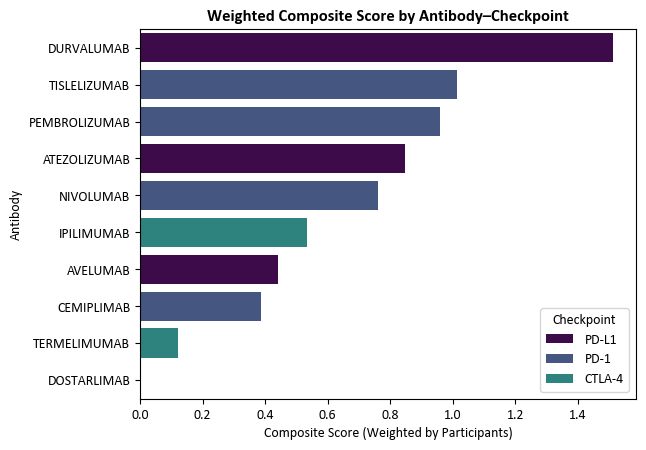

In [31]:
sns.barplot(data=grouped.sort_values('Composite_score', ascending=False),
            x='Composite_score', y='Antibody', hue='Checkpoint', palette=viridis_hex)
plt.title('Weighted Composite Score by Antibody–Checkpoint')
plt.xlabel('Composite Score (Weighted by Participants)')
plt.savefig(f'{output_dir}/weighted_composite_scire_by_ab_ckpt.pdf', bbox_inches = 'tight', dpi = 300)
plt.show()

/var/folders/53/7nzjfc950dz9z0q174xdmhj00000gn/T/ipykernel_87909/3178150706.py:18: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Checkpoint', palette=viridis_hex, s=100)


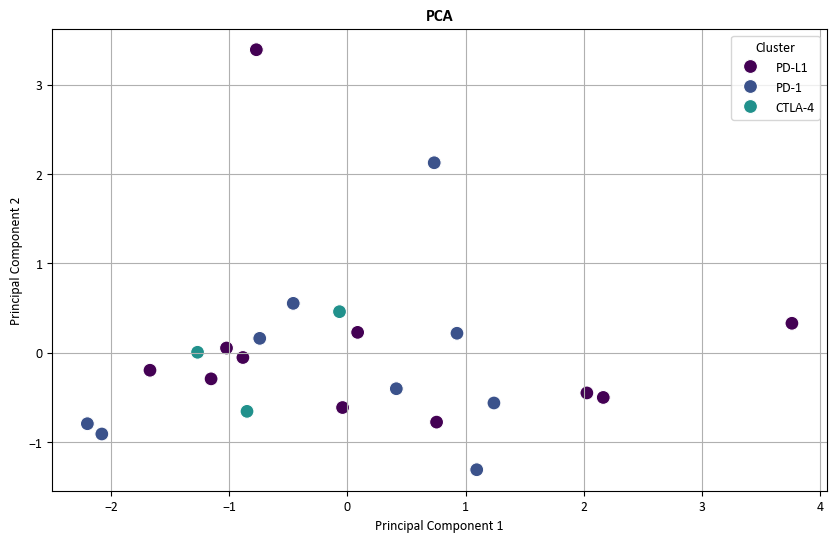

In [32]:
features = df_clinical[['OS', 'PFS', 'ORR', 'Participants']].dropna()
scaled = StandardScaler().fit_transform(features)


# Reduce to 2D
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled)

# Add PCA coordinates and cluster labels to a new DataFrame
df_pca = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
df_pca['Composite_score'] = df_clinical.loc[features.index, 'Composite_score'].values 
df_pca['Antibody'] = df_clinical.loc[features.index, 'Antibody'].values  # optional for labeling

df_pca['Checkpoint'] = df_clinical.loc[features.index, 'Checkpoint'].values  # optional for labeling

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Checkpoint', palette=viridis_hex, s=100)
plt.title('PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.savefig(f'{output_dir}/pca_ckpt.pdf', bbox_inches = 'tight', dpi = 300)
plt.show()

In [33]:
top = grouped.sort_values('Composite_score', ascending=False).head(5)
bottom = grouped.sort_values('Composite_score').head(5)

print("Top performers:\n", top)
print("\nWorst performers:\n", bottom)

Top performers:
         Antibody Checkpoint  Composite_score  Participants
4     DURVALUMAB      PD-L1         1.510848           641
9   TISLELIZUMAB       PD-1         1.012841           450
7  PEMBROLIZUMAB       PD-1         0.960211           845
0   ATEZOLIZUMAB      PD-L1         0.846522          1278
6      NIVOLUMAB       PD-1         0.762266           792

Worst performers:
        Antibody Checkpoint  Composite_score  Participants
3   DOSTARLIMAB       PD-1         0.002428            49
8  TERMELIMUMAB     CTLA-4         0.119496          1114
2    CEMIPLIMAB       PD-1         0.386985           304
1      AVELUMAB      PD-L1         0.440370          1657
5    IPILIMUMAB     CTLA-4         0.534807           521


In [34]:
binding_data = pd.read_csv('data/structural_analysis/Paratope/structural_paratope_all_information_final.csv')

In [35]:
# Filter out necessary columns
# Define datasets for individual inhibitory checkpoints
data = pd.read_csv('data/ab_ag.tsv', sep='\t')
pd1 = data[data['compound'].str.contains('PD-1', na=False)]
pdl1 = data[data['compound'].str.contains('PD-L1', na=False)]
ctla4 = data[data['compound'].str.contains('CTLA-4', na=False)]
kir = data[data['compound'].str.contains('KIR', na=False)]
lag3 = data[data['compound'].str.contains('LAG', na=False)]
tim3 = data[data['compound'].str.contains('TIM3', na=False)]


pd1 = pd1[['pdb', 'Hchain', 'Lchain', 'antigen_chain', 'antigen_type', 'antigen_name', 'compound', 'resolution', 'method']]
pdl1 = pdl1[['pdb', 'Hchain', 'Lchain', 'antigen_chain', 'antigen_type', 'antigen_name', 'compound', 'resolution', 'method']]
ctla4 = ctla4[['pdb', 'Hchain', 'Lchain', 'antigen_chain', 'antigen_type', 'antigen_name', 'compound', 'resolution', 'method']]
kir = kir[['pdb', 'Hchain', 'Lchain', 'antigen_chain', 'antigen_type', 'antigen_name', 'compound', 'resolution', 'method']]
lag3 = lag3[['pdb', 'Hchain', 'Lchain', 'antigen_chain', 'antigen_type', 'antigen_name', 'compound', 'resolution', 'method']]
tim3 = tim3[['pdb', 'Hchain', 'Lchain', 'antigen_chain', 'antigen_type', 'antigen_name', 'compound', 'resolution', 'method']]


combined_dataset = [pdl1, pd1, ctla4, kir, lag3, tim3]

# Shuffle the list randomly
random.shuffle(combined_dataset)

# Concatenate them in the new random order
merged_df = pd.concat(combined_dataset, ignore_index=True)
shuffled_df = merged_df.sample(frac=1).reset_index(drop=True)

shuffled_df = shuffled_df[shuffled_df['resolution'] < 3.5]
shuffled_df = shuffled_df.dropna()

# 1. Filter all relevant rows: those with 'mab' OR 'M6903'
ab_mask = shuffled_df['compound'].str.contains('mab|M6903', na=False, case=False)
shuffled_df_ab = shuffled_df[ab_mask]

# 2. Extract antibody names
shuffled_df_ab['antibody'] = shuffled_df_ab['compound'].str.extract(r'\b(\w*mab)\b', expand=False)

# 3. Fill in M6903 manually where missing
m6903_mask = shuffled_df_ab['compound'].str.contains('M6903', na=False)
shuffled_df_ab.loc[m6903_mask, 'antibody'] = shuffled_df_ab.loc[m6903_mask, 'antibody'].fillna('M6903')

# # 4. Extract checkpoint names
checkpoints_pattern = r'\b(PD-1|PD-L1|CTLA-4|KIR2DL3|TIM3)\b'
shuffled_df_ab['checkpoint'] = shuffled_df_ab['compound'].str.extract(checkpoints_pattern, expand=False)

# # 5. Final formatting
shuffled_df_ab['antibody'] = shuffled_df_ab['antibody'].str.upper()

/var/folders/53/7nzjfc950dz9z0q174xdmhj00000gn/T/ipykernel_87909/2430222038.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shuffled_df_ab['antibody'] = shuffled_df_ab['compound'].str.extract(r'\b(\w*mab)\b', expand=False)
/var/folders/53/7nzjfc950dz9z0q174xdmhj00000gn/T/ipykernel_87909/2430222038.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shuffled_df_ab['checkpoint'] = shuffled_df_ab['compound'].str.extract(checkpoints_pattern, expand=False)
/var/folders/53/7nzjfc950dz9z0q174xdmhj00000gn/T/i

In [36]:
# Filter and concatenate the best performers into one clean DataFrame
best_ab_names = ['DURVALUMAB', 'TISLELIZUMAB', 'PEMBROLIZUMAB', 'ATEZOLIZUMAB', 'NIVOLUMAB']

best_performers = pd.concat([
    shuffled_df_ab[shuffled_df_ab['antibody'] == ab]
    for ab in best_ab_names
], ignore_index=True)

In [37]:
# Filter and concatenate the worst performers into one clean DataFrame
worst_ab_names = ['DOSTARLIMAB', 'TREMELIMUMAB', 'CEMIPLIMAB', 'AVELUMAB', 'IPILIMUMAB']

worst_performers = pd.concat([
    shuffled_df_ab[shuffled_df_ab['antibody'] == ab]
    for ab in worst_ab_names
], ignore_index=True)

/var/folders/53/7nzjfc950dz9z0q174xdmhj00000gn/T/ipykernel_87909/1831179088.py:13: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  sns.barplot(data=merged_binding,


<Axes: xlabel='pdb_id', ylabel='paratope_area'>

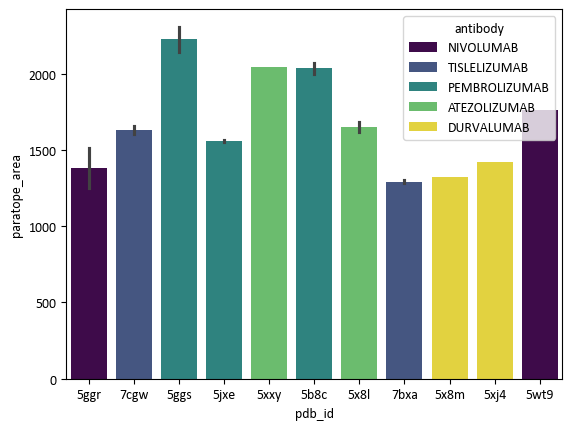

In [38]:
best_binding_data = binding_data[binding_data['pdb_id'].isin(best_performers['pdb'].unique())]

# Merge on pdb ID
merged_binding = best_binding_data.merge(
    best_performers[['pdb', 'antibody']],
    how='left',
    left_on='pdb_id',
    right_on='pdb'
)

merged_binding.drop_duplicates()

sns.barplot(data=merged_binding,
            x='pdb_id', y='paratope_area', hue='antibody', palette=viridis_hex)

/var/folders/53/7nzjfc950dz9z0q174xdmhj00000gn/T/ipykernel_87909/1427768673.py:15: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  sns.barplot(data=merged_binding,


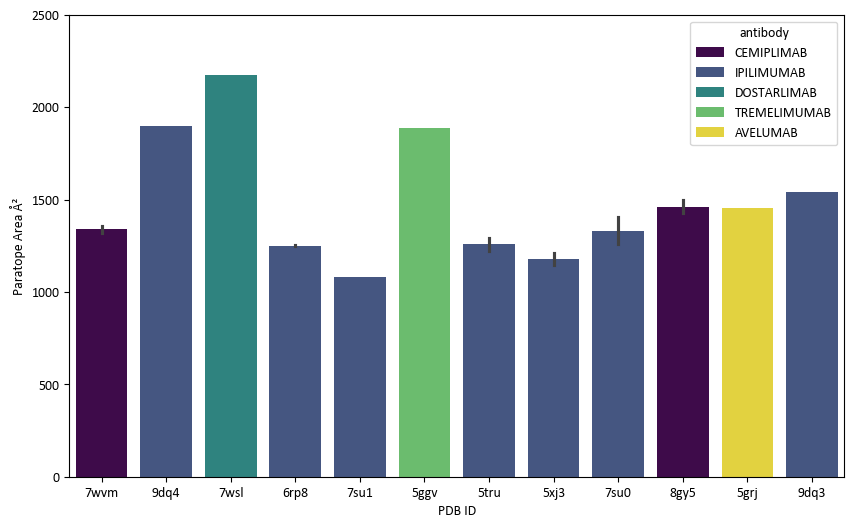

In [39]:
worst_binding_data = binding_data[binding_data['pdb_id'].isin(worst_performers['pdb'].unique())]

# Merge on pdb ID
merged_binding = worst_binding_data.merge(
    worst_performers[['pdb', 'antibody']],
    how='left',
    left_on='pdb_id',
    right_on='pdb'
)

merged_binding.drop_duplicates()

plt.figure(figsize=(10, 6))

sns.barplot(data=merged_binding,
            x='pdb_id', y='paratope_area', hue='antibody', palette=viridis_hex)

plt.ylabel('Paratope Area Å²')
plt.xlabel('PDB ID')
plt.ylim(top = 2500)

plt.savefig(f'{output_dir}/paratope_area_per_ab.pdf', bbox_inches = 'tight', dpi = 300)

/var/folders/53/7nzjfc950dz9z0q174xdmhj00000gn/T/ipykernel_87909/1885212513.py:29: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.barplot(data=merged_all,


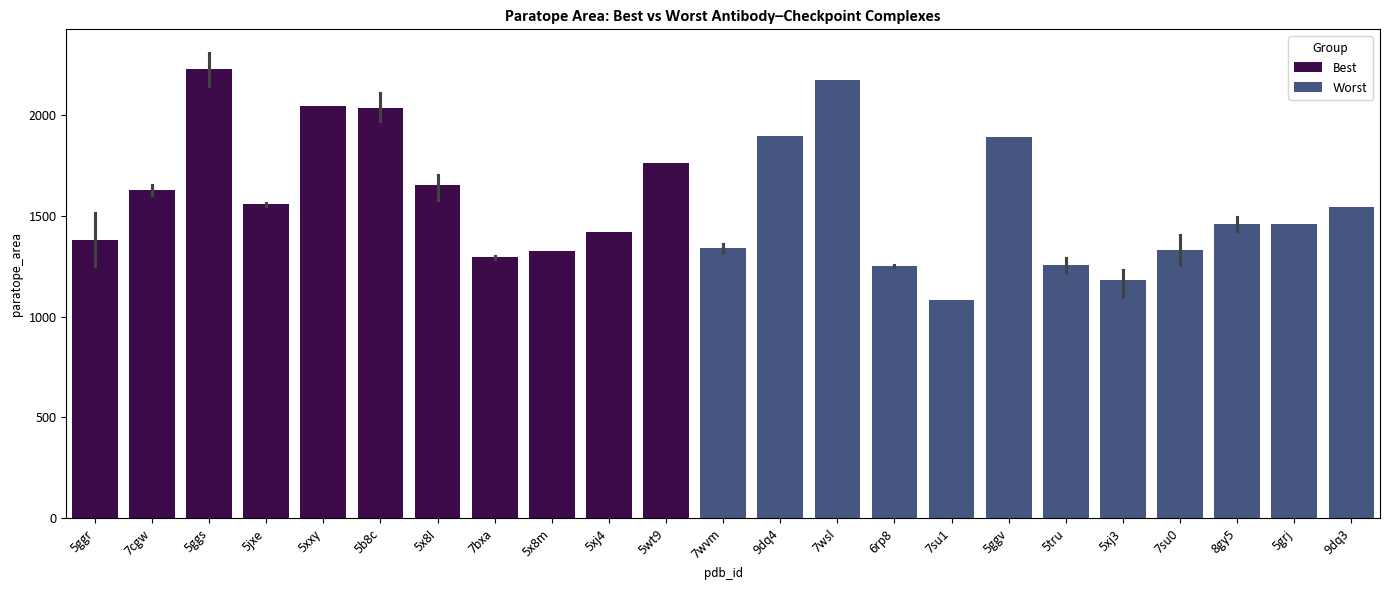

In [40]:
# BEST
best_binding_data = binding_data[binding_data['pdb_id'].isin(best_performers['pdb'].unique())]
merged_best = best_binding_data.merge(
    best_performers[['pdb', 'antibody']],
    how='left',
    left_on='pdb_id',
    right_on='pdb'
)
merged_best['Group'] = 'Best'

# WORST
worst_binding_data = binding_data[binding_data['pdb_id'].isin(worst_performers['pdb'].unique())]
merged_worst = worst_binding_data.merge(
    worst_performers[['pdb', 'antibody']],
    how='left',
    left_on='pdb_id',
    right_on='pdb'
)
merged_worst['Group'] = 'Worst'

# Combine both
merged_all = pd.concat([merged_best, merged_worst], ignore_index=True)

# Optional: clean duplicates
merged_all = merged_all.drop_duplicates(subset=['pdb_id', 'paratope_area'])

# Barplot — grouped by Group (best/worst)
plt.figure(figsize=(14, 6))
sns.barplot(data=merged_all,
            x='pdb_id', y='paratope_area', hue='Group', palette=viridis_hex)

plt.xticks(rotation=45, ha='right')
plt.title('Paratope Area: Best vs Worst Antibody–Checkpoint Complexes')
plt.tight_layout()
plt.show()

/var/folders/53/7nzjfc950dz9z0q174xdmhj00000gn/T/ipykernel_87909/1846891394.py:6: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.barplot(data=merged_all,


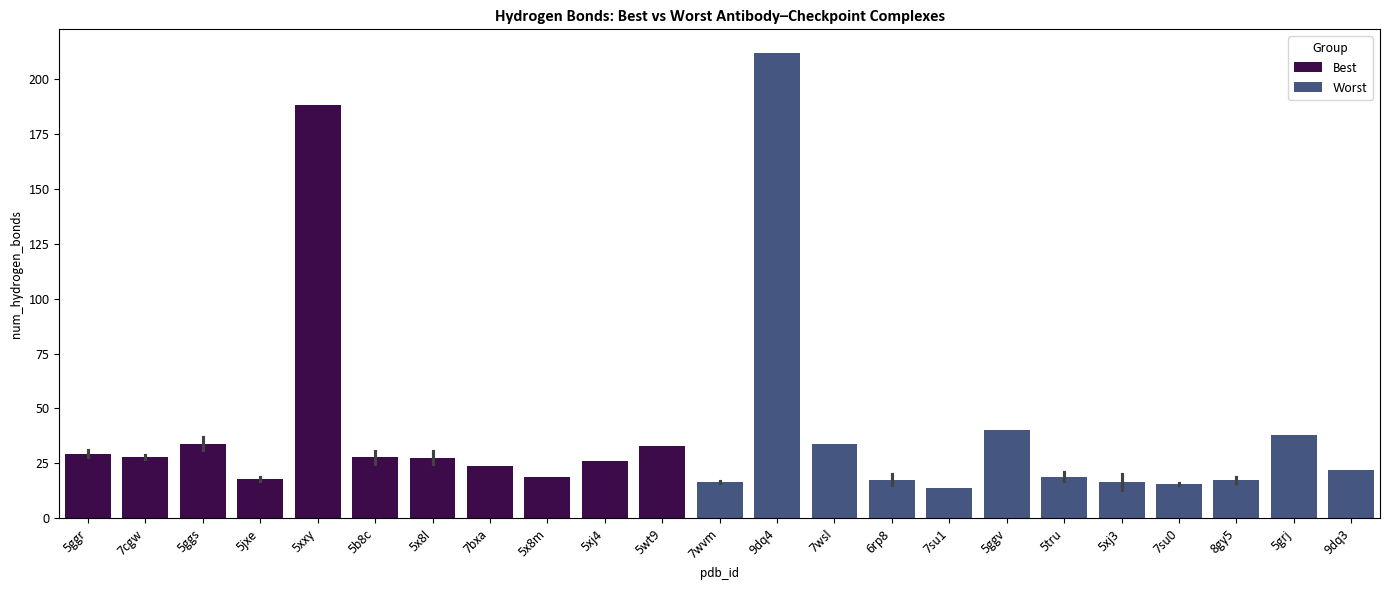

In [41]:
# Optional: clean duplicates
merged_all = merged_all.drop_duplicates(subset=['pdb_id', 'num_hydrogen_bonds'])

# Barplot — grouped by Group (best/worst)
plt.figure(figsize=(14, 6))
sns.barplot(data=merged_all,
            x='pdb_id', y='num_hydrogen_bonds', hue='Group', palette=viridis_hex)

plt.xticks(rotation=45, ha='right')
plt.title('Hydrogen Bonds: Best vs Worst Antibody–Checkpoint Complexes')
plt.tight_layout()
plt.show()

/var/folders/53/7nzjfc950dz9z0q174xdmhj00000gn/T/ipykernel_87909/64874044.py:6: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.barplot(data=merged_all,


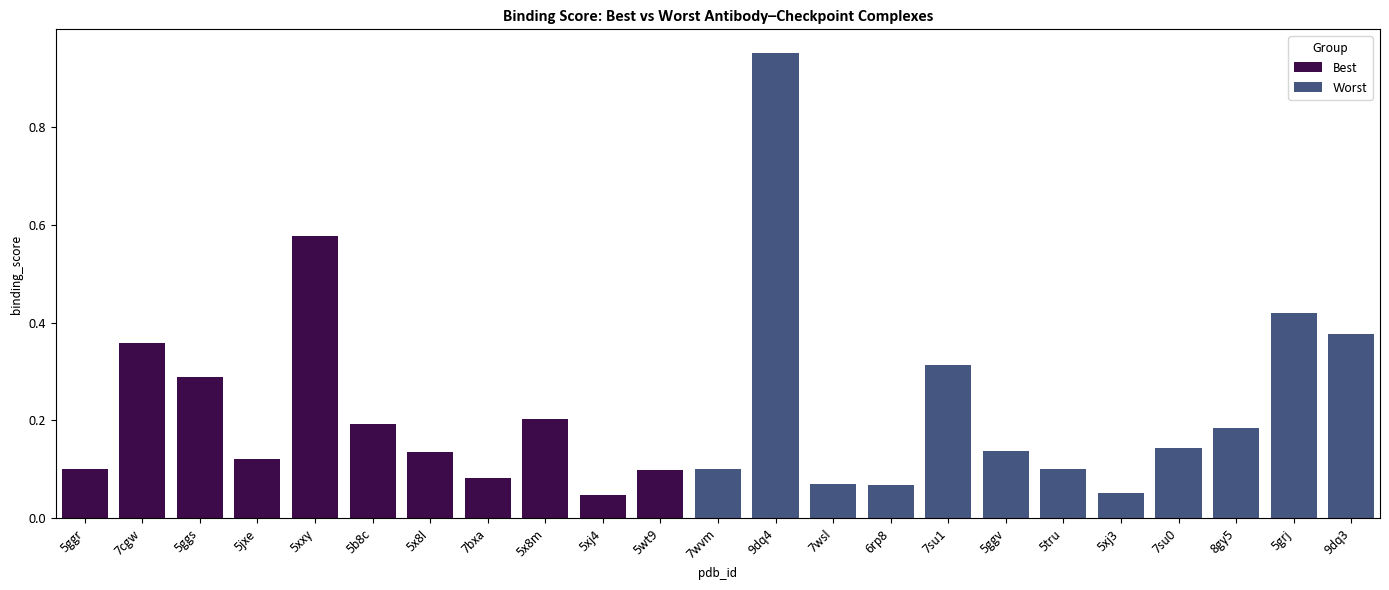

In [42]:
# Optional: clean duplicates
merged_all = merged_all.drop_duplicates(subset=['pdb_id', 'binding_score'])

# Barplot — grouped by Group (best/worst)
plt.figure(figsize=(14, 6))
sns.barplot(data=merged_all,
            x='pdb_id', y='binding_score', hue='Group', palette=viridis_hex)

plt.xticks(rotation=45, ha='right')
plt.title('Binding Score: Best vs Worst Antibody–Checkpoint Complexes')
plt.tight_layout()
plt.show()

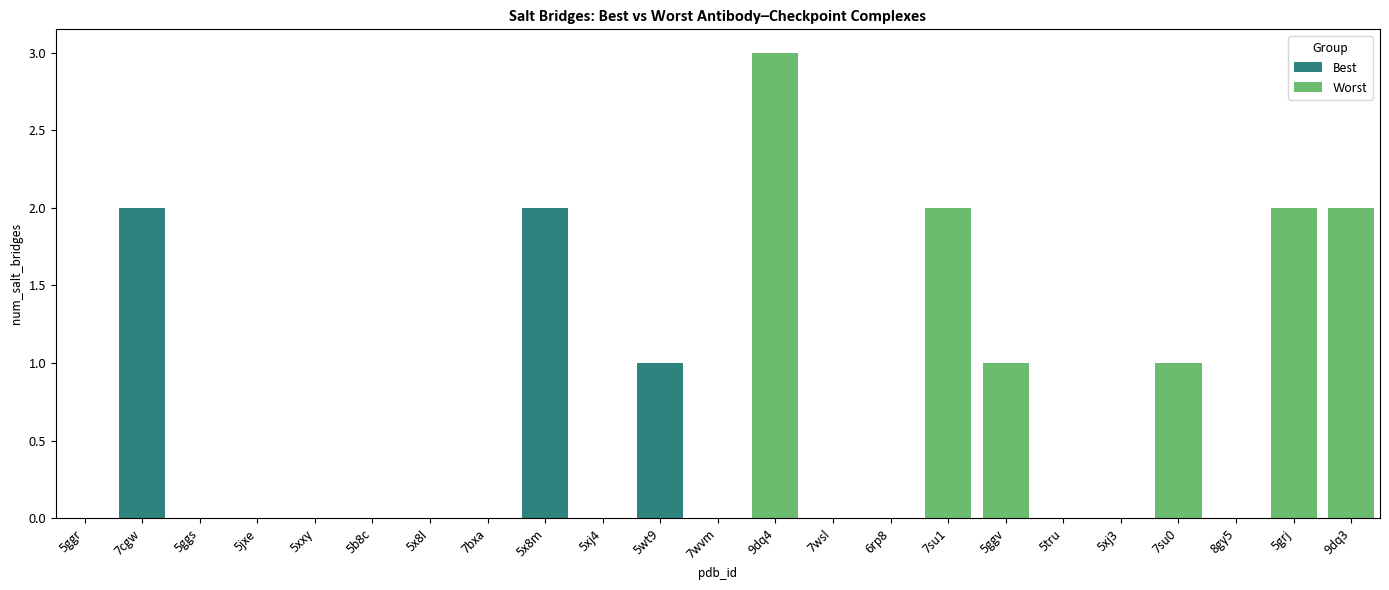

In [43]:
# Optional: clean duplicates
merged_all = merged_all.drop_duplicates(subset=['pdb_id', 'num_salt_bridges'])

# Barplot — grouped by Group (best/worst)
plt.figure(figsize=(14, 6))
sns.barplot(data=merged_all,
            x='pdb_id', y='num_salt_bridges', hue='Group', palette=viridis_hex[2:4])

plt.xticks(rotation=45, ha='right')
plt.title('Salt Bridges: Best vs Worst Antibody–Checkpoint Complexes')
plt.tight_layout()
plt.savefig(f'{output_dir}/best_worst_comp_salt_bridges.pdf', bbox_inches = 'tight', dpi = 300)

plt.savefig(
   f'{output_dir}/best_worst_comp_salt_bridges.png',
    dpi=300,
    bbox_inches='tight',
    transparent=True
)


plt.show()

In [44]:
# Subset the groups
best = merged_all[merged_all['Group'] == 'Best']['num_salt_bridges']
worst = merged_all[merged_all['Group'] == 'Worst']['num_salt_bridges']

# Check normality (optional)
_, p_best = stats.shapiro(best)
_, p_worst = stats.shapiro(worst)

if p_best > 0.05 and p_worst > 0.05:
    # Both are normally distributed — use t-test
    stat, p_value = stats.ttest_ind(best, worst, equal_var=False)
    print(f"T-test: p = {p_value:.4f}")
else:
    # Not normal — use Mann-Whitney U test
    stat, p_value = stats.mannwhitneyu(best, worst, alternative='two-sided')
    print(f"Mann-Whitney U test: p = {p_value:.4f}")


Mann-Whitney U test: p = 0.2749


In [45]:
epitope_data = pd.read_csv('data/structural_analysis/Epitope/epitope_surface_hbonds_salt_bridges_summary.csv')

/var/folders/53/7nzjfc950dz9z0q174xdmhj00000gn/T/ipykernel_87909/4107930721.py:29: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.barplot(data=merged_all,


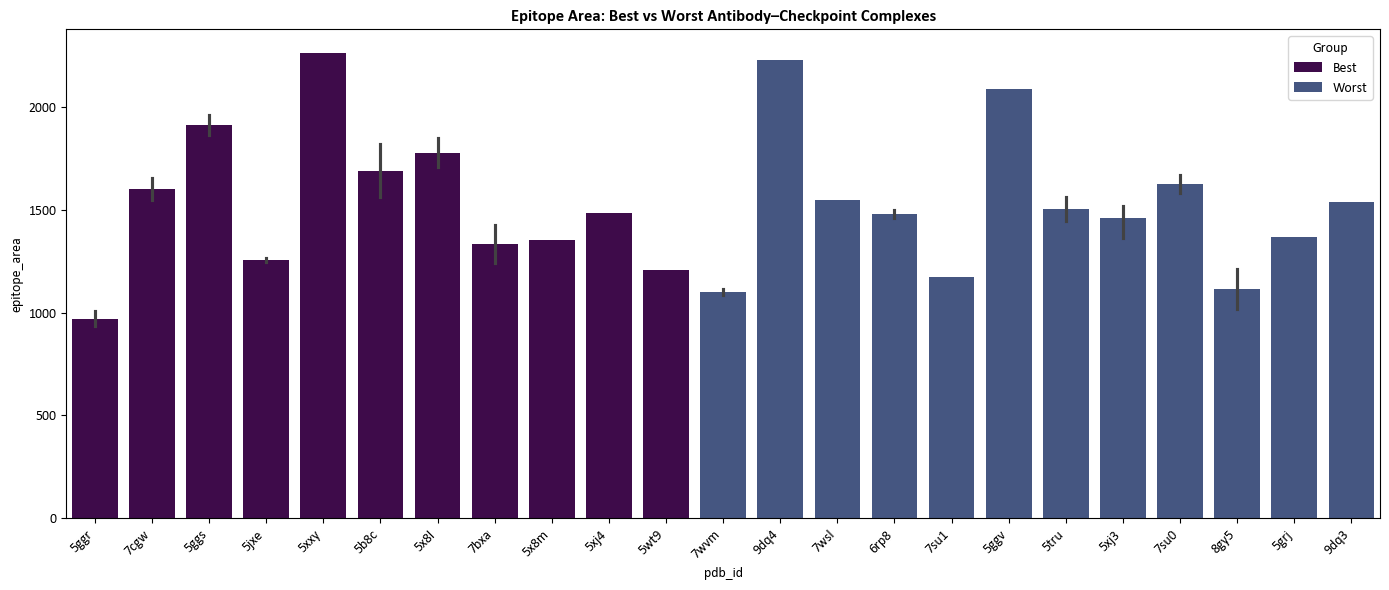

In [46]:
# BEST
best_binding_data = epitope_data[epitope_data['pdb_id'].isin(best_performers['pdb'].unique())]
merged_best = best_binding_data.merge(
    best_performers[['pdb', 'antibody']],
    how='left',
    left_on='pdb_id',
    right_on='pdb'
)
merged_best['Group'] = 'Best'

# WORST
worst_binding_data = epitope_data[epitope_data['pdb_id'].isin(worst_performers['pdb'].unique())]
merged_worst = worst_binding_data.merge(
    worst_performers[['pdb', 'antibody']],
    how='left',
    left_on='pdb_id',
    right_on='pdb'
)
merged_worst['Group'] = 'Worst'

# Combine both
merged_all = pd.concat([merged_best, merged_worst], ignore_index=True)

# Optional: clean duplicates
merged_all = merged_all.drop_duplicates(subset=['pdb_id', 'epitope_area'])

# Barplot — grouped by Group (best/worst)
plt.figure(figsize=(14, 6))
sns.barplot(data=merged_all,
            x='pdb_id', y='epitope_area', hue='Group', palette=viridis_hex)

plt.xticks(rotation=45, ha='right')
plt.title('Epitope Area: Best vs Worst Antibody–Checkpoint Complexes')
plt.tight_layout()
plt.show()

In [47]:
section = 'interface'
files = [
    f'data/ctla4/ctla4_{section}_residue_frequencies_pivot.csv',
    f'data/kir/kir_{section}_residue_frequencies_pivot.csv',
    f'data/pdl1/pdl1_{section}_residue_frequencies_pivot.csv',
    f'data/pd1/pd1_{section}_residue_frequencies_pivot.csv',
    f'data/tim3/tim3_{section}_residue_frequencies_pivot.csv',
    f'data/lag3/lag3_{section}_residue_frequencies_pivot.csv'
]

# Read all CSVs into a list of DataFrames
dfs = [pd.read_csv(f) for f in files]

# Concatenate them
residue_df = pd.concat(dfs, ignore_index=True)


# Reshape: from wide to long format
residue_long = residue_df.melt(
    id_vars='residue_name',
    var_name='pdb_id',
    value_name='count'
)

# Remove the 'mean' row if needed
residue_long = residue_long[residue_long['pdb_id'] != 'mean']

In [48]:
pdb_map = merged_all[['pdb_id', 'antibody', 'Group']].drop_duplicates()
residue_long_with_ab = residue_long.merge(
    pdb_map,
    how='left',
    on='pdb_id'
)

# Drop rows where 'antibody' is missing
residue_long_with_ab = residue_long_with_ab.dropna(subset=['antibody'])

# Optional: then drop duplicates if needed
residue_long_with_ab = residue_long_with_ab.drop_duplicates()

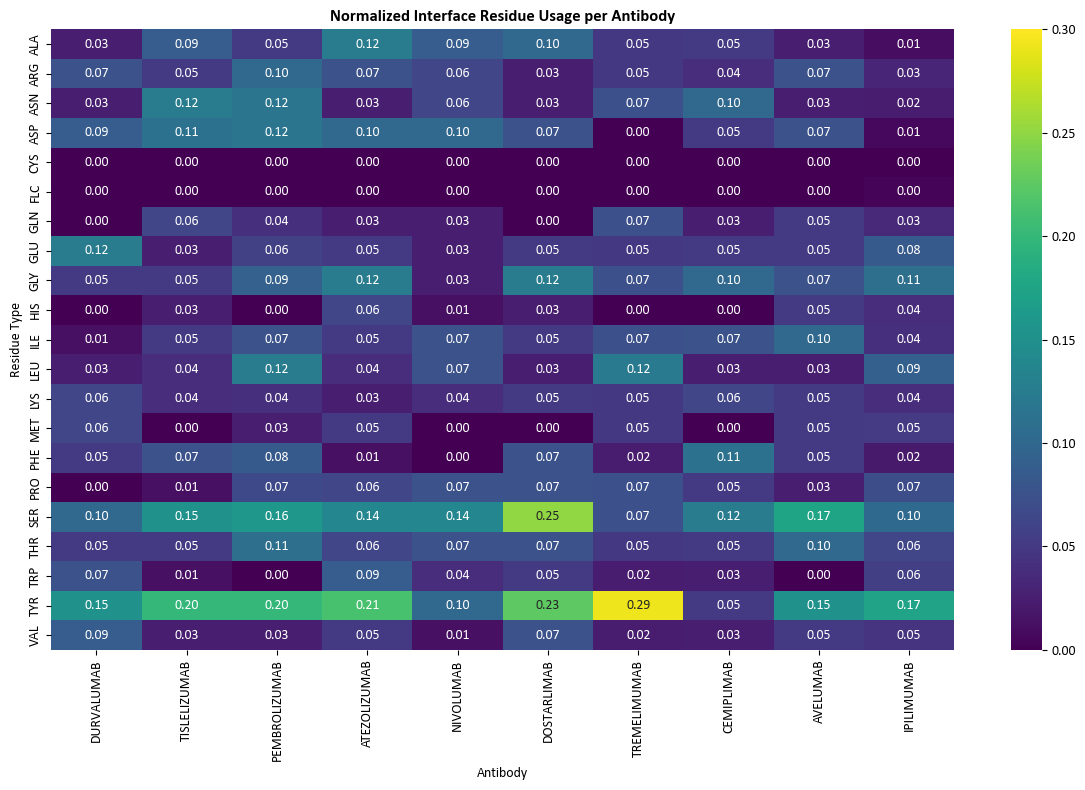

In [ ]:
# Calculate sequence length per antibody
seq_lengths = residue_long_with_ab.groupby('antibody').size()

# Step 2: Pivot table of raw counts
heatmap_data = residue_long_with_ab.pivot_table(
    index='residue_name',
    columns='antibody',
    values='count',
    aggfunc='sum',
    fill_value=0
)

# Step 3: Normalize by sequence length (divide each column by its respective sequence length)
heatmap_data_normalized = heatmap_data.divide(seq_lengths, axis='columns')

# Define the full order: best first, then worst, then any remaining antibodies
all_columns = list(heatmap_data_normalized.columns)
remaining_columns = [col for col in all_columns if col not in best_ab_names + worst_ab_names]
sorted_columns = best_ab_names + worst_ab_names + remaining_columns

# Reorder the DataFrame columns
heatmap_sorted = heatmap_data_normalized[sorted_columns]

# Plot
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_sorted, cmap='viridis', annot=True, fmt='.2f', vmax=0.3)

ax = plt.gca()  # get current axes

# Set all text and spines to white
ax.set_title(f"Mean {section.capitalize()} Residue Frequencies Across Checkpoints", fontsize=14, color='white')
ax.set_xlabel("Checkpoint", color='white')
ax.set_ylabel("Amino Acid", color='white')
ax.tick_params(axis='x', colors='white', rotation=45)
ax.tick_params(axis='y', colors='white')

# White border around heatmap
for spine in ax.spines.values():
    spine.set_edgecolor('white')

# Set annotation text color inside the heatmap
for text in ax.texts:
    text.set_color('white')

# Get colorbar and set its tick labels to white
colorbar = ax.collections[0].colorbar
colorbar.ax.yaxis.set_tick_params(color='white')
for label in colorbar.ax.get_yticklabels():
    label.set_color('white')




plt.title(f'Normalized {section.capitalize()} Residue Usage per Antibody')
plt.ylabel('Residue Type')
plt.xlabel('Antibody')
plt.tight_layout()
plt.savefig(f'{output_dir}/normalized_{section}_residue_usage_per_ab.pdf', bbox_inches = 'tight', dpi = 300)

plt.savefig(
    f'{output_dir}/normalized_{section}_residue_usage_per_ab.png',
    dpi=300,
    bbox_inches='tight',
    transparent=True
)


plt.show()

In [50]:
# compare normally elevetaded composition for selected antibodies (2 bad performing, 2 good performing)
best_values = heatmap_data_normalized.loc[['TYR', 'SER', 'GLY'], ['DOSTARLIMAB', 'TREMELIMUMAB']].values.flatten()
worst_values = heatmap_data_normalized.loc[['TYR', 'SER', 'GLY'], ['NIVOLUMAB', 'DURVALUMAB']].values.flatten()

In [51]:
stat, pval = ttest_rel(best_values, worst_values)
print(f"U-statistic: {stat:.4f}")
print(f"P-value: {pval:.4e}")

U-statistic: 2.9294
P-value: 3.2654e-02


In [91]:

# Load and merge
section = "epitope"
df_seq = pd.read_csv(f"data/structural_analysis/Epitope/buried_epitope_sequences_summary.csv")
df_seq[f"{section}_length"] = df_seq[f"buried_{section}_sequence"].str.len()
df_bs = pd.read_csv('data/structural_analysis/Epitope/epitope_hbonds_salt_bridges_summary.csv')
df_merged = df_seq.merge(df_bs, on="pdb_id")

# Plot: all points in yellow
plt.figure(figsize=(7, 5))
sns.scatterplot(
    data=df_merged,
    x="epitope_length",
    y="binding_score",
    color="#21918c",         # or "yellow"
    s=100,
    alpha = 0.7
)

plt.xlabel("Epitope Length", fontsize=12)
plt.ylabel("Binding Affinity Score", fontsize=12)
plt.title("Epitope Length vs. Binding Affinity", fontsize=13)
plt.tight_layout()
plt.show()

ValueError: Could not interpret value `binding_score` for `y`. An entry with this name does not appear in `data`.

<Figure size 700x500 with 0 Axes>

In [92]:
df_merged

,pdb_id,H_chain_x,L_chain_x,antigen_chain_x,buried_epitope_sequence,folder_x,structure_id,epitope_length,H_chain_y,L_chain_y,antigen_chain_y,epitope_area,buried_epitope_area,num_filtered_hbonds,num_salt_bridges,folder_y
0,7su0,I,M,D,YIEEKRYQML,ctla4,7su0_ID_1,10,I,M,D,1668.169678,1232.433838,14,0,ctla4
1,7su0,I,M,D,YIEEKRYQML,ctla4,7su0_ID_1,10,H,L,C,1579.147217,831.052795,12,0,ctla4
2,5xj3,J,K,L,VMLERYPKK,ctla4,5xj3_ID_1,9,D,E,F,1529.390869,1003.261108,15,0,ctla4
3,5xj3,J,K,L,VMLERYPKK,ctla4,5xj3_ID_1,9,G,H,I,1317.388306,725.980042,9,0,ctla4
4,5xj3,J,K,L,VMLERYPKK,ctla4,5xj3_ID_1,9,J,K,L,1496.876709,1069.363037,13,0,ctla4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,6txz,I,M,B,FAIMNDG,tim3,6txz_ID_3,7,K,O,D,1617.145996,874.267151,20,0,tim3
126,6txz,H,L,A,AVDGNEF,tim3,6txz_ID_4,7,H,L,A,1590.850586,654.466003,18,0,tim3
127,6txz,H,L,A,AVDGNEF,tim3,6txz_ID_4,7,I,M,B,1503.130249,682.697510,15,0,tim3
128,6txz,H,L,A,AVDGNEF,tim3,6txz_ID_4,7,J,N,C,1528.493164,623.341187,15,0,tim3


In [79]:
merged_all = merged_all.rename(columns={"antibody": "Antibody"})
merged_all_composite = merged_all.merge(grouped[["Antibody", "Composite_score"]], on="Antibody", how="left")

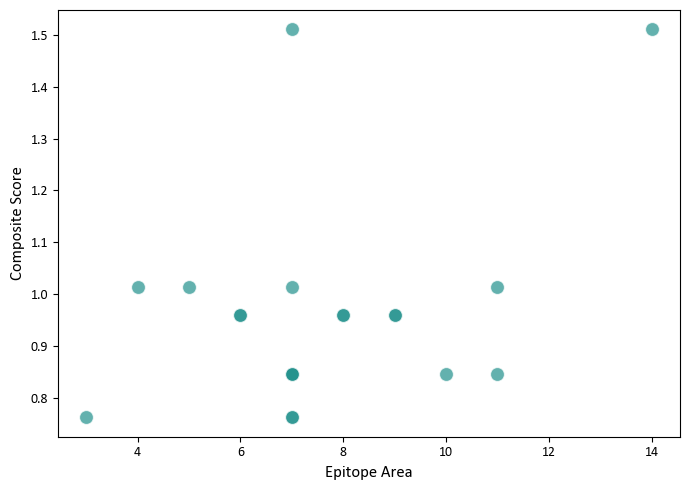

In [84]:
# Plot: all points in yellow
plt.figure(figsize=(7, 5))
sns.scatterplot(
    data=merged_all_composite,
    x="sequence_length",
    y="Composite_score",
    color="#21918c",         # or "yellow"
    s=100,
    alpha = 0.7
)

plt.xlabel("Epitope Area", fontsize=12)
plt.ylabel("Composite Score", fontsize=12)
plt.tight_layout()
plt.show()

In [86]:
df_bs

,pdb_id,H_chain,L_chain,antigen_chain,epitope_area,num_hydrogen_bonds,num_salt_bridges,folder,structure_id,epitope_sequence,binding_score
0,5ggr,A,B,Y,934.019348,28,0,pd1,5ggr_ID_1,PDRSAPKA,0.107776
1,7wvm,C,D,F,1084.120728,17,0,pd1,7wvm_ID_1,SESAKA,0.049196
2,7cgw,H,L,P,1545.606567,29,2,pd1,7cgw_ID_1,NTDKDRP,0.357084
3,9dq4,H,L,A,2228.426514,212,3,ctla4,9dq4,IQEREKEMPYFVGM,0.937149
4,5ggs,A,B,Z,1961.435181,37,0,pd1,5ggs_ID_1,SFNTKDSLKA,0.256711
5,5jxe,D,C,B,1262.868408,17,0,pd1,5jxe_ID_1,NDKPDRSP,0.013538
6,7wsl,H,L,D,1546.500366,34,0,pd1,7wsl,ESPERSA,0.081953
7,5xxy,H,L,A,2262.729736,188,0,pdl1,5xxy,DAIYEMEDKNQHVRMGAYR,0.600000
8,7wvm,A,B,E,1114.703125,16,1,pd1,7wvm_ID_2,ESVPEAKA,0.049196
9,5b8c,H,G,I,1523.636963,23,0,pd1,5b8c_ID_1,SESFNKPDSLP,0.115495


In [85]:
df_seq

,pdb_id,H_chain,L_chain,antigen_chain,epitope_sequence,folder,structure_id,epitope_length
0,5tru,h,l,c,RKEMYLI,ctla4,5tru_ID_1,7
1,5xj3,A,B,C,RKEMYL,ctla4,5xj3_ID_1,6
2,6rp8,H,L,C,MEMYL,ctla4,6rp8_ID_1,5
3,7su0,H,L,C,MEKMYLI,ctla4,7su0_ID_1,7
4,5xj3,J,K,L,KRVKEMPYL,ctla4,5xj3_ID_2,9
5,5ggv,H,L,Y,KMQIKMPYLI,ctla4,5ggv,10
6,5xj3,D,E,F,KERKEMYL,ctla4,5xj3_ID_3,8
7,9dq4,H,L,A,IQEREKEMPYFVGM,ctla4,9dq4,14
8,5tru,H,L,C,HEKMYLI,ctla4,5tru_ID_2,7
9,5xj3,G,H,I,ERVEMY,ctla4,5xj3_ID_4,6
